# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [802]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
plt.style.use('fivethirtyeight')
%matplotlib inline

In [803]:
from dotenv import load_dotenv  # loading the  environment 


In [804]:
# Loading Environment from the operating system
load_dotenv()

True

In [805]:
# Natural Language Processing Toolkit
import nltk
import spacy
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter # count the key-value pairs
from spacy import displacy # dependency visualizer that show model's predictions
nlp = spacy.load("en_core_web_sm") # English pipeline optimization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [806]:
# Get the API keys from env

consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret_key = os.getenv("TWITTER_API_SECRET_KEY")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [807]:
# checking the API keys validate or not

In [808]:
#type(consumer_key)

In [809]:
#type(consumer_secret_key)

In [810]:
#type(access_token)

In [811]:
#type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [812]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [813]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [814]:
tweet_list = getTweets()

Please enter keyword or hashtag to search: EV Best Stock
Number of tweets to analyze: 500


In [815]:
tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
tweet_list_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1421382839300415493,2021-07-31 08:10:51,"@bopinion Wow Bloomberg,wow. How much $ Ford a...",,0,0
1,1421236926569357312,2021-07-30 22:31:03,RT @ElectricAutonmy: “This assessment of the l...,"Nanaimo, BC",1,0
2,1421183826143977473,2021-07-30 19:00:03,“This assessment of the life-cycle GHG emissio...,Canada,1,3
3,1421156134036066690,2021-07-30 17:10:00,"@ev_spacs Easy, Tough Guy! I am on record sayi...",,0,1
4,1421147852328210440,2021-07-30 16:37:06,Top 5 Electric Vehicle EV Stocks in 2021 | Bes...,"Surat, India",0,0


In [816]:
tweet_list_df.shape

(55, 6)

In [817]:
### USE DIFFERENT FILE NAME TO SAVE EACH SEARCH. OR else it will replace the previous data
write_df_to_csv(tweet_list_df,"EV_best_2_tweet.csv")

In [705]:
## read_csv with new search data to check. We do not need these lines .. 
## it is just to check if how may tweets we are getting. 

In [634]:
mnf_tweet = pd.read_csv("EV_Manufacturer_tweet.csv")

In [19]:
stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [20]:
best_tweet = pd.read_csv("Best_EV_Stock_tweet.csv")

In [21]:
future_tweet = pd.read_csv("Future_EV_Stock_tweet.csv")

In [22]:
top_tweet =  pd.read_csv("Top_EV_Maker_tweet.csv")

In [23]:
company_tweet =  pd.read_csv("EV_Company_tweet.csv")

In [24]:
#stock_tweet.shape

In [25]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [818]:
path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
all_files = glob.glob(path + "/*.csv")
#all_files

In [819]:
tweets = []

for filename in all_files:
    df = pd.read_csv(filename,  index_col=None, parse_dates=True,  header=0) # Convert each csv to a dataframe
    tweets.append(df)

tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes
tweets_df['Date']= pd.to_datetime(tweets_df['Date'])
tweets_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1420544025631760384,2021-07-29 00:37:42,@ev_truths @alex_avoigt I think EV technology ...,"Seattle, WA",0,0
1,1420519469865177088,2021-07-28 23:00:08,Compact International(1994) Wants to be Top EV...,U.S.A,0,0
2,1419726996104486919,2021-07-26 18:31:07,RT @cliffski: Toyota are not much better than ...,"Louisville, KY",2,0
3,1419703662092472320,2021-07-26 16:58:24,Toyota are not much better than volkswagen. Th...,None of your business,2,4
4,1419665554038681606,2021-07-26 14:26:58,GM China’s Venture Has Big Ambitions Beyond $4...,Vancouver and London,0,0


In [820]:
tweets_df.dtypes

Id                   int64
Date        datetime64[ns]
Tweets              object
Location            object
Retweets             int64
Favorite             int64
dtype: object

### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [821]:
#Get number of rows and columns
tweets_df.shape 

(12676, 6)

In [870]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

0

In [868]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset='Tweets',keep="last") 

In [869]:
# Check the shape after dropping duplicates
tweets_df.shape 

(7890, 10)

In [871]:
# Check for "NaN" values
tweets_df.isna().any() 

Id                   False
Date                 False
Tweets               False
Location             False
Retweets             False
Favorite             False
Processed_Tweets     False
Tweets_Nouns         False
Tweets_Adjectives    False
Tweets_Sentiments    False
dtype: bool

In [826]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [827]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [828]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [829]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [830]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt',
                 'company', 'instead','&','’', 'in', 'car','they','\'your', 'what', 'also', 'seeing','agreement',
                 'time','today','ktown','pc','wts','105k','55k','ed','seeing','takeover','brokerages','rap','meet',
                 'maker','launch','vehicle','market','year','news','technology','price','auto','med','lpo','make',
                 'bakersfieldcart','takeaway','late','catching','lates','board','ranges'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them

In [831]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [832]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the nouns on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        nouns (list): A list with all the nouns in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [833]:
# Helper functions
def all_adjectives(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [834]:
# Apply all_noun function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Nouns'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [835]:
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(all_adjectives)

In [836]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [837]:
# function to return words to their base form using Lemmatizer
# ref: https://jess-analytics.medium.com/
def preprocessTweetsSentiments(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [838]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
tweets_df['Tweets_Sentiments'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [839]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Nouns'].tolist()
tweets_long_string = " ".join(tweets_long_string)

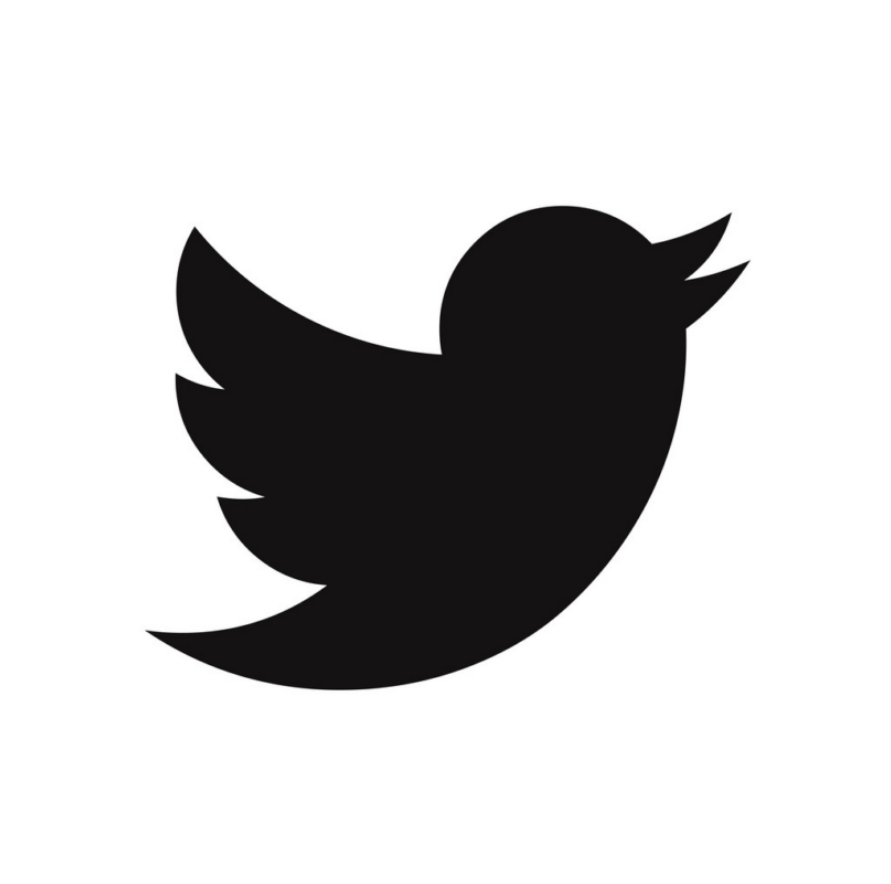

In [840]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

In [841]:
# Create function to generate the blue colour for the Word CLoud

def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

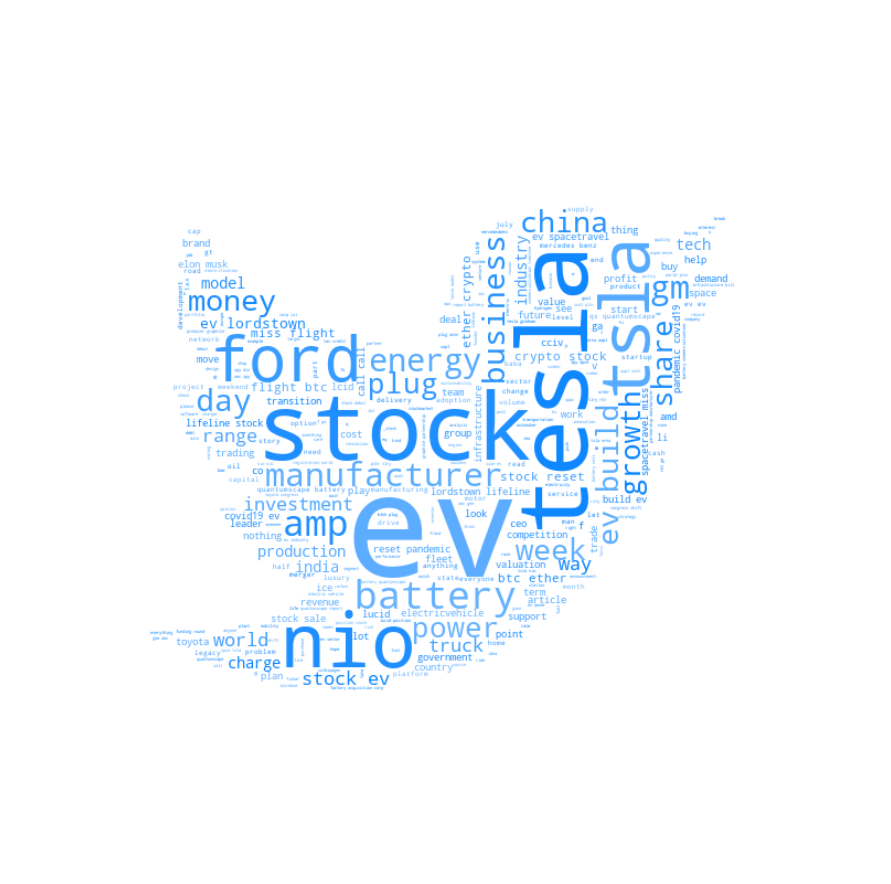

In [842]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
# ref: https://amueller.github.io/word_cloud/auto_examples/masked.html
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [843]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Nouns'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [844]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head(5)

,Words,Count
0,ev,2186
15,stock,949
14,tesla,636
837,nio,450
35,battery,441


### 5. Sentiment Analysis

In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle. 

In [845]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/syedahasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [846]:
# Creating the CountVectorizer instance defining the stopwords in English to be ignored
vectorizer = CountVectorizer(stop_words="english")

words = []
# Getting the tokenization and occurrence counting
X = vectorizer.fit_transform(tweets_df['Tweets_Sentiments'])
# Retrieve unique words list
words = vectorizer.get_feature_names()
words.extend(words)
#print(words)

In [847]:
# Getting the TF-IDF
# A TfidfVectorizer() instance is created by passing the stopwords in English as a parameter.
vectorizer = TfidfVectorizer(stop_words="english")
X_tweets = vectorizer.fit_transform(tweets_df['Processed_Tweets'])

In [848]:
# Getting matrix info
print(f"Matrix shape: {X_tweets.shape}")
print(f"Total number of tweets: {X_tweets.shape[0]}")
print(f"Total number of unique words (tokens): {X_tweets.shape[1]}")

Matrix shape: (7890, 14094)
Total number of tweets: 7890
Total number of unique words (tokens): 14094


In [849]:
# Retrieve words list from tweets
words_tweets = vectorizer.get_feature_names()
#print(words_tweets)

In [850]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
# The mean value of the TF–IDF for each term is used to create the DataFrame.
words_tweets_df = pd.DataFrame(
    list(zip(words_tweets, np.ravel(X_tweets.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_tweets_df = words_tweets_df.sort_values(by=["TF-IDF"], ascending=False)

In [851]:
words_tweets_df.head()

,Word,TF-IDF
5364,ev,0.041710
9117,nio,0.032799
5013,electric,0.025797
12657,tesla,0.018599
12162,stock,0.018497


In [852]:
# Lowest 10 TF-IDF scores
words_tweets_df.tail()

,Word,TF-IDF
2185,atl,0.000011
10993,risking5,0.000011
9876,pitt,0.000011
3459,cin,0.000011
2350,az,0.000011


In [853]:
tweets_freq_df = pd.DataFrame(
    list(zip(vectorizer.get_feature_names(), np.ravel(X.sum(axis=0)))),
    columns=["Word", "Frequency"],
)

# Order the DataFrame by word frequency, instead of TF-IDF like above, in descending order
tweets_freq_df = tweets_freq_df.sort_values(by=["Frequency"], ascending=False)

# Print the top 10 words
tweets_freq_df.head(10)

,Word,Frequency
5097,embarrassing,4624
8564,meters,1817
4763,dragtimes,1658
11356,sec,1519
11806,snake,1093
2403,balls,609
8502,meg,607
12178,stockssuccess,605
2913,brqs,536
10460,raceway,457


In [854]:
# Top words will be those with a frequency between 100 ans 300 (thumb rule)
top_words = tweets_freq_df[
    (tweets_freq_df["Frequency"] >= 100) & (tweets_freq_df["Frequency"] <= 500)
]

top_words.head(10)

,Word,Frequency
10460,raceway,457
8202,lrcx,440
1850,amat,428
5623,factually,405
8280,magnets,403
7545,jitters,401
3216,catholyte,391
12531,tariffs,389
7860,lawsuits,375
3011,butter,354


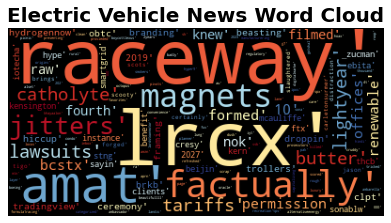

In [891]:
# Create a string list of terms to generate the word cloud
terms_list = str(top_words["Word"].tolist())

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Electric Vehicle News Word Cloud", fontdict=fontdict)
plt.show()

In [856]:
tweets_df.columns

Index(['Id', 'Date', 'Tweets', 'Location', 'Retweets', 'Favorite',
       'Processed_Tweets', 'Tweets_Nouns', 'Tweets_Adjectives',
       'Tweets_Sentiments'],
      dtype='object')

In [857]:
tweets_df.dtypes

Id                            int64
Date                 datetime64[ns]
Tweets                       object
Location                     object
Retweets                      int64
Favorite                      int64
Processed_Tweets             object
Tweets_Nouns                 object
Tweets_Adjectives            object
Tweets_Sentiments            object
dtype: object

In [858]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [859]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet_compound": [],
    "tweet_pos": [],
    "tweet_neu": [],
    "tweet_neg": [],
    "tweet_sent": [],
}


# Get sentiment for the tweet
# iterrows() method is used to iterate across the dataframe 
for index, row in tweets_df.iterrows():
    try:
        # Sentiment scoring with VADER
        tweet_sentiment = analyzer.polarity_scores(row["Processed_Tweets"])  # VADER sentiment scores are retrieved for title
        tweet_sent["tweet_compound"].append(tweet_sentiment["compound"])
        tweet_sent["tweet_pos"].append(tweet_sentiment["pos"])
        tweet_sent["tweet_neu"].append(tweet_sentiment["neu"])
        tweet_sent["tweet_neg"].append(tweet_sentiment["neg"])
        tweet_sent["tweet_sent"].append(get_sentiment(tweet_sentiment["compound"]))
        
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
tweet_sentiment_df = pd.DataFrame(tweet_sent)

tweet_sentiment_df.head()

,tweet_compound,tweet_pos,tweet_neu,tweet_neg,tweet_sent
0,0.9246,0.567,0.433,0.0,1
1,0.2023,0.265,0.735,0.0,1
2,0.8442,0.532,0.468,0.0,1
3,0.8720,0.476,0.524,0.0,1
4,0.0000,0.000,1.000,0.0,0


In [860]:
# The Tone Analyzer response is given in JSON format, 
# so the json_normalize function is imported from Pandas to transform the JSON response to a DataFrame.
from pandas import json_normalize

# ToneAnalyzerV3 is the main library to access to the Tone Analyzer via Python.
from ibm_watson import ToneAnalyzerV3

# IAMAuthenticator is used to authenticate your Python application to access the IBM cloud services.
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import json

In [861]:
# Get the Tone Analyzer API Key and URL
tone_api = os.getenv("IBM_API")
tone_url = os.getenv("IBM_URL")

In [862]:
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [877]:
tweets_df["Processed_Tweets"][5]

'tsla bear admits ev earnings may top expectations july 22 2021 one wall street analyst bearish tesla admits electric likely beat second-quarter earnings expectations see shares drift higher temporarily'

In [876]:
# Analyze the text's tone with the 'tone()' method.

# tone(): The general tone analysis, aimed to score tone on short text
# (such as reviews, emails, or social media) or even larger texts (such as articles or blog post)

# it only needs to receive a text to score, however, additional parameters could be used
# https://cloud.ibm.com/apidocs/tone-analyzer?code=python#data-handling

tone_analysis = tone_analyzer.tone( 
    {"text": tweets_df["Processed_Tweets"][5]},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
print(json.dumps(tone_analysis, indent=2))

# On the JSON response, the tone is given for the entire document on the document_tone element 
# as well as for each sentence of the document on the sentences_tone element.

{
  "document_tone": {
    "tones": [
      {
        "score": 0.664718,
        "tone_id": "tentative",
        "tone_name": "Tentative"
      },
      {
        "score": 0.802309,
        "tone_id": "analytical",
        "tone_name": "Analytical"
      }
    ]
  }
}


In [888]:
tweets_sh = tweets_df.iloc[:500]
tweets_sh = tweets_sh.drop_duplicates('Processed_Tweets', keep='last')

In [889]:
# Define conversational utterances (spoken, written expressions/actions)
utterances = []
for x in tweets_sh["Processed_Tweets"]:
    v = [{"text": x}]
    utterances = utterances + v

# Analyze utterances using the 'tone_chat()' method

# tone_chat(): The customer engagement tone analysis, designed to monitor customer service and support conversations
# based on utterances between an agent and a customer
utterance_analysis = tone_analyzer.tone_chat(
    utterances=utterances, content_language="en", accept_language="en"
).get_result()
print(json.dumps(utterance_analysis, indent=2))

# On the JSON response, all the tone scores for each utterance are under the utterances_tone element.

{
  "utterances_tone": [
    {
      "utterance_id": 0,
      "utterance_text": "_truths _avoigt think ev still pretty new room improve best invest amp keep fresh top ev",
      "tones": [
        {
          "score": 0.872201,
          "tone_id": "excited",
          "tone_name": "Excited"
        }
      ]
    },
    {
      "utterance_id": 1,
      "utterance_text": "compact international 1994 wants top ev-brake",
      "tones": [
        {
          "score": 0.615788,
          "tone_id": "polite",
          "tone_name": "Polite"
        }
      ]
    },
    {
      "utterance_id": 2,
      "utterance_text": "toyota much better volkswagen legacy companies customers best interests anywhere the\u2026",
      "tones": [
        {
          "score": 0.928329,
          "tone_id": "excited",
          "tone_name": "Excited"
        },
        {
          "score": 0.683147,
          "tone_id": "satisfied",
          "tone_name": "Satisfied"
        }
      ]
    },
    {
      "utteran

In [890]:
# The JSON response is converted to a Pandas DataFrame using the json_normalize method.
# The meta argument is used to include the utterance_id and utterance_text on each row.
tweet_tone_df = json_normalize(
    data=utterance_analysis["utterances_tone"],
    record_path=["tones"],
    meta=["utterance_id", "utterance_text"],
)
tweet_tone_df

,score,tone_id,tone_name,utterance_id,utterance_text
0,0.872201,excited,Excited,0,_truths _avoigt think ev still pretty new room...
1,0.615788,polite,Polite,1,compact international 1994 wants top ev-brake
2,0.928329,excited,Excited,2,toyota much better volkswagen legacy companies...
3,0.683147,satisfied,Satisfied,2,toyota much better volkswagen legacy companies...
4,0.846007,excited,Excited,3,toyota much better volkswagen legacy companies...
5,0.596085,sad,Sad,17,knowing never big fail ev battery giant catl d...
6,0.716268,excited,Excited,19,_update byd china world leading electric manuf...
7,0.759492,frustrated,Frustrated,20,maybe life dedicated attacking ev manufacturer...
8,0.656882,excited,Excited,22,always 10 steps ahead every manufacturer plane...
9,0.547999,sad,Sad,23,yes sad story believe rights name cars reverte...


In [444]:
from newsapi import NewsApiClient

In [446]:
# Reading the News API key enviroment variable
api_key = os.getenv("NEWS_API")
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [ ]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)
    
keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Number of tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword, keyword = keyword + " -filter:retweets", lang="en", ).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



# Sentiment Analysis
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
 
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
        
# Set the sentiment variables as sentiment of tweet  
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
tweet_list

In [ ]:
tweet_list.columns = ["Tweets"]

In [ ]:
tweet_list['Tweets'] = tweet_list['Tweets'].apply(clean_tweet)

In [ ]:
tweet_list["Tweets"][3]

In [ ]:
tweet_list

In [ ]:
import emoji
import spacy
import stop_words

nlp = spacy.load('en_core_web_sm')

stopwords = [w.lower() for w in stop_words.get_stop_words('en')]

emoticon_string = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
    )"""

def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

def sanitize(text):
    """ Sanitize one string """

    # remove graphical emoji
    string = give_emoji_free_text(string) 

    
    return text

In [ ]:
tweet_list['Tweets'] = sanitize(tweet_list['Tweets'])

In [ ]:
# combine all tweets into one list
for i in list(tweet_list): 
    text = tweet_list[i].tolist()

In [ ]:
# combine into one string
text = ' '.join(text)

In [ ]:
# # combine into one string
# text_string = ''
# for x in text:
#     text_string += ' ' + x

In [ ]:
# Sentence Tokenization
tokenized_text=sent_tokenize(text)
print(tokenized_text)

In [ ]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

In [ ]:
# Frequency Distribution
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

In [ ]:
fdist.most_common(10)

In [ ]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [ ]:
# Stopwords- considered as noise in the text.

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

In [ ]:
# Removing Stopwords
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

In [ ]:
# Stemming - reduces words to their word root word

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

In [ ]:
#Lemmatization - reduces words to their base word

In [ ]:
# from nltk.stem.wordnet import WordNetLemmatizer
# lem = WordNetLemmatizer()

# from nltk.stem.porter import PorterStemmer
# stem = PorterStemmer()

# word = "flying"
# print("Lemmatized Word:",lem.lemmatize(word,"v"))
# print("Stemmed Word:",stem.stem(word))

In [ ]:
# Sentiment analysis

In [ ]:
text.Sentiment.value_counts()